# PROJETO 1

## <font color='red'>Raphael Costa</font>
___

## <font color='blue'>A evolução do acesso a tecnologia é igual para Idosos/Aposentados e para Jovens?</font>

## Introdução

Descreva aqui a motivação para escolha dos grupos e o que pretende analisar!

Exemplifique identificando uma pesquisa semelhante feita no Brasil ou no exterior que compare uma parcela da população (apossentados, imigrantes, mulheres, jovens) com todo resto. Critique esta pesquisa (que tipo de variáveis usou? Que recurso de estatística descritiva?). Pode ser um artigo de jornal.


####   Para este projeto, analisarei o acessoa da tecnologia, através da utilização de computadores, celulares e afins, porém, de um grupo específico: os aposentados. Por intuição, temos que a maioria dos aposentados são idosos, isso faz com que o acesso a tecnologia por eles seja de muito menos frequente e, consequentemente, muito mais dificil. 
####   Durante a semana me deparei com uma matéria do globo.com na qual sua manchete dizia "Jovem brasileiro é mais conectado à internet do que a média global" e ainda, em sua descrição, dizia: "Pesquisa mostra que adolescentes, se pudessem, implantavam até um chip. Para esta geração conectada, um emoji vale mais que mil palavras." Através desta matéria, o acessoa a tecnologia por diferentes ramos sociais da sociedade tornou-se um assunto a ser discutido.
####   Assim, decidi analisar a situação do idoso/aposentado brasileiro na atualidade. Mais do que isso, comparar este acesso com o acesso proporcionado pelos tais "Jovens mais conectados do mundo" e mostrar um pouco desta diferença de realidades, mostrar o impacto de uma mudança de gerações, que apesar de tentarem se apoioarem uma na outra, ainda sobram diferenças imensas.
####    Além disso, ter acesso a tecnologia nos dias de hoje representa, de uma certa forma, um aspecto de qualidade de vida. Quanto mais acesso você tem, mais informações possui, logo, mais benefícios você tem a recorrer. Portanto, ainda através dos resultados, obteremos uma noção da qualidade de vida dos idosos e/ou aposentados brasileiros para anos diferentes.

## Variáveis utilizadas:
## - V8005 (Idade)
## - Regiao (criada, distingue as UFs entre as regiões BRs, como sudeste, sul e etc)
## - Idoso (criada)
## - Indiv (criada e que separa indivíduos entre crianças, adolescentes, Jovens, Adultos e Idosos)
## - V06111 (Teve acesso a internet nos últimos 6 meses)
## - V06112 (Tem telefone celular próprio)
## - V061112 (O acesso a internet foi feito por meio de microcomputador)
## - V4720 (Rendimento mensal de todas as fontes para pessoas de 10 anos ou mais de idade)

## Análise e Resultados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Raphael\Desktop\Insper\2_semestre\Ciência dos Dados\CDEng\Projeto1


In [3]:
"""Vamos ler a estrutura da PNAD como um dataframe.
    São muitas colunas e precisamos usar a informação de tamanho para ler a PNAD de fato
    como uma base de tamanho fixo"""
estrutura = pd.read_table("pes_py.txt", sep=";")

In [4]:
estrutura.head()

,Coluna,Tamanho,Título
0,V0101,4,Ano de referência
1,UF,2,Unidade da Federação
2,V0102,6,Número de controle
3,V0103,3,Número de série
4,V0301,2,Número de ordem


In [5]:
# Se quiser uma leitura mais rápida, use o arquivo descompactado. Não esqueça de adicionar ao seu .gitignore
pnad2014 = pd.read_fwf("PES2014.txt", widths=estrutura.Tamanho, header=None)

# Se quiser economizar espaço, use o arquivo Zip
#pnad2014 = pd.read_fwf("PES2014.zip", widths=estrutura.Tamanho, header=None, compression="zip")

In [6]:
pnad2014.head()

,0,1,2,3,4,5,6,7,8,9,...,331,332,333,334,335,336,337,338,339,340
0,2014,11,15,1,1,2,19,8,1987,27,...,3.0,500.0,3.0,3,1.0,2.0,2.0,1.0,500.0,20160623
1,2014,11,15,1,2,4,19,1,1986,28,...,3.0,500.0,3.0,4,2.0,NaN,2.0,1.0,500.0,20160623
2,2014,11,15,1,3,2,14,5,2013,1,...,3.0,500.0,3.0,1,NaN,NaN,NaN,NaN,500.0,20160623
3,2014,11,15,2,1,2,8,4,1963,51,...,2.0,1150.0,4.0,2,1.0,2.0,2.0,1.0,1150.0,20160623
4,2014,11,15,2,2,4,6,11,1970,43,...,2.0,1150.0,4.0,3,1.0,2.0,2.0,1.0,1150.0,20160623


In [7]:
estrutura.columns

Index(['Coluna', 'Tamanho', 'Título'], dtype='object')

In [9]:
pnad2014.columns = estrutura.Coluna

In [10]:
pnad2014.head()

Coluna,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,V8005,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,2014,11,15,1,1,2,19,8,1987,27,...,3.0,500.0,3.0,3,1.0,2.0,2.0,1.0,500.0,20160623
1,2014,11,15,1,2,4,19,1,1986,28,...,3.0,500.0,3.0,4,2.0,NaN,2.0,1.0,500.0,20160623
2,2014,11,15,1,3,2,14,5,2013,1,...,3.0,500.0,3.0,1,NaN,NaN,NaN,NaN,500.0,20160623
3,2014,11,15,2,1,2,8,4,1963,51,...,2.0,1150.0,4.0,2,1.0,2.0,2.0,1.0,1150.0,20160623
4,2014,11,15,2,2,4,6,11,1970,43,...,2.0,1150.0,4.0,3,1.0,2.0,2.0,1.0,1150.0,20160623


In [11]:
pnad2011 = pd.read_csv("PES2011.csv", sep = ',')

In [13]:
pnad2011.head()

,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,V8005,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,2011,11,11000000.0,1,1,2,25,12,1961,49,...,4.0,1.000000e+12,99.0,2,1.0,2.0,2.0,1.0,1.000000e+12,20100000.0
1,2011,11,11000000.0,1,2,4,1,4,1978,33,...,4.0,1.000000e+12,99.0,6,2.0,NaN,NaN,2.0,1.000000e+12,20100000.0
2,2011,11,11000000.0,1,3,4,15,6,1996,15,...,4.0,1.000000e+12,99.0,3,2.0,NaN,NaN,2.0,1.000000e+12,20100000.0
3,2011,11,11000000.0,1,4,2,3,12,2001,9,...,4.0,1.000000e+12,99.0,2,2.0,NaN,NaN,2.0,1.000000e+12,20100000.0
4,2011,11,11000000.0,2,1,4,16,10,1959,51,...,4.0,1.461000e+03,5.0,4,1.0,2.0,2.0,1.0,1.461000e+03,20100000.0


# Para efeitos de visualização, os gráficos aqui mostrados seguiram um padrão de plotagem: um gráfico de 2014 se seguirá de um gráfico de 2011 para comparação, exceto em alguns casos em que se queira analisar apenas 2014 ou nas variáveis que só estão presentes no PNAD de 2014

In [14]:
pnad2014["REGIAO"] = pnad2014.UF

def regiao(uf):
    if uf < 18:
        return "Norte"
    elif uf < 30:
        return "Nordeste"
    elif uf < 36:
        return "Sudeste"
    elif uf < 44:
        return "Sul"
    else:
        return "Centro-oeste"

pnad2014.REGIAO = pnad2014.REGIAO.map(regiao)

In [15]:
pnad2011["REGIAO"] = pnad2011.UF

def regiao(uf):
    if uf < 18:
        return "Norte"
    elif uf < 30:
        return "Nordeste"
    elif uf < 36:
        return "Sudeste"
    elif uf < 44:
        return "Sul"
    else:
        return "Centro-oeste"

pnad2011.REGIAO = pnad2011.REGIAO.map(regiao)

In [16]:
#Renomeando os Estados
pnad2014.UF = pnad2014.UF.astype('category')
pnad2014.UF.cat.categories=('RR', 'AC', 'AM', 'RO', 
                            'PA', 'AP', 'TO', 'MA', 
                            'PI', 'CE', 'RN', 'PB', 
                            'PE', 'AL', 'SE', 'BA', 
                            'MG', 'ES', 'RJ', 'SP', 
                            'PR', 'SC', 'RS', 'MS', 
                            'MT', 'GO', 'DF')

In [17]:
#Renomeando os Estados
pnad2011.UF = pnad2011.UF.astype('category')
pnad2011.UF.cat.categories=('RR', 'AC', 'AM', 'RO', 
                            'PA', 'AP', 'TO', 'MA', 
                            'PI', 'CE', 'RN', 'PB', 
                            'PE', 'AL', 'SE', 'BA', 
                            'MG', 'ES', 'RJ', 'SP', 
                            'PR', 'SC', 'RS', 'MS', 
                            'MT', 'GO', 'DF')

In [18]:
idade = pnad2014.V8005
idade.describe()

count    362627.000000
mean         33.554051
std          21.017324
min           0.000000
25%          16.000000
50%          32.000000
75%          49.000000
max         120.000000
Name: V8005, dtype: float64

In [19]:
idade_11 = pnad2011.V8005
idade_11.describe()

count    358919.000000
mean         32.223613
std          20.642626
min           0.000000
25%          15.000000
50%          30.000000
75%          47.000000
max         111.000000
Name: V8005, dtype: float64

### Através do describe da variável idade nos dois anos ja podemos identificar algumas mudanças, como o aumento da média da idade do brasileiro, o aumento do valor do primeiro, segundo e do terceiro quartil e o aumento da idade máxima apresentada. Tudo isso representa um aumento na expectativa de vida do brasileiro.

In [20]:
pnad2014["IDOSO"] = pnad2014.V8005
pnad2014.IDOSO[(pnad2014.V8005 <= 65)] = "False"
pnad2014.IDOSO[(pnad2014.V8005 > 65)] = "True"
pnad2014["JOVEM"] = pnad2014.V8005
pnad2014.JOVEM[(pnad2014.V8005 <= 24)] = "False"
pnad2014.JOVEM[(pnad2014.V8005 > 17)] = "True"

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [21]:
pnad2011["IDOSO"] = pnad2011.V8005
pnad2011.IDOSO[(pnad2011.V8005 <= 65)] = "False"
pnad2011.IDOSO[(pnad2011.V8005 > 65)] = "True"
pnad2011["JOVEM"] = pnad2011.V8005
pnad2011.JOVEM[(pnad2011.V8005 <= 24)] = "False"
pnad2011.JOVEM[(pnad2011.V8005 > 17)] = "True"

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of

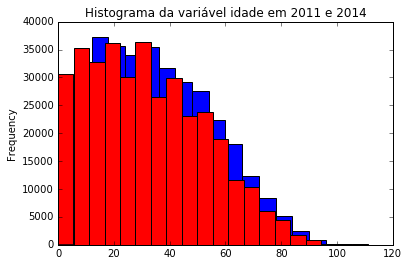

In [222]:
idade = pnad2014.V8005
idade.plot.hist(bins = 20)
plt.title("Histograma da variável idade em 2014")

idade_11 = pnad2011.V8005
idade_11.plot.hist(bins = 20,  color="red")
plt.title("Histograma da variável idade em 2011 e 2014")

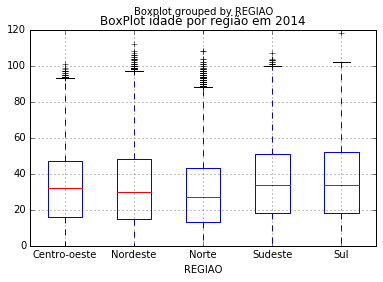

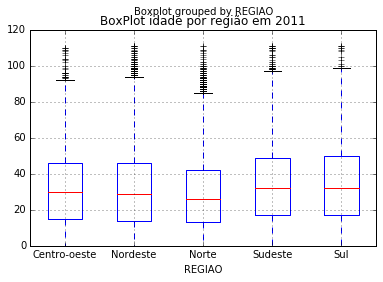

In [32]:
pnad2014.boxplot(column="V8005", by="REGIAO")
plt.title("BoxPlot idade por região em 2014")
pnad2011.boxplot(column="V8005", by="REGIAO")
plt.title("BoxPlot idade por região em 2011")

## Através da analise dos dois histogramas apresentados e dos dois boxplots, podemos observar que em poucos anos, o número de pessoas que estão na casa dos 20 anos tornou-se a maior, e, além disso, no boxplot, percebemos que nestes anos manteve-se um padrão: a maior mediana de idades ocorre no Sudeste e no Sul, ou seja, os idosos concentra-se nestas areás.

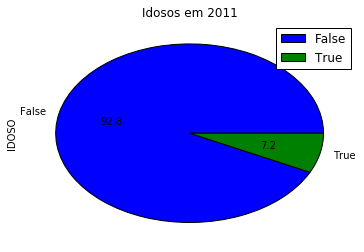

In [93]:
idosos_por_regiao_11 = pd.crosstab(pnad2011.IDOSO, pnad2011.REGIAO)
idosos_total_11 = pnad2011.IDOSO.value_counts(True)
plot11 = idosos_total_11.plot(kind='pie', autopct='%.1f')
plt.title('Idosos em 2011')
plt.legend(loc='best')

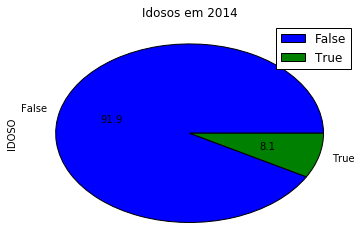

In [92]:
idosos_por_regiao = pd.crosstab(pnad2014.IDOSO, pnad2014.REGIAO)
idosos_total = pnad2014.IDOSO.value_counts(True)
plot1 = idosos_total.plot(kind='pie', autopct='%.1f')
plt.title('Idosos em 2014')
plt.legend(loc='best')

## Houve um aumento de 1% no número de idosos no País

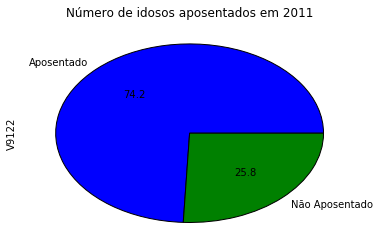

In [160]:
aposentados11 = pnad2011.V9122.astype("category")
aposentados11.cat.categories = ("Aposentado", "Não Aposentado")
ap_maior_de_15_11 = aposentados11[(pnad2011.V8005 >= 15) & (pnad2011.IDOSO == 'True')]
ap_freq_11 = ap_maior_de_15_11.value_counts(True) 
ap_freq_11.plot(kind="pie", autopct='%.1f')
plt.title("Número de idosos aposentados em 2011")

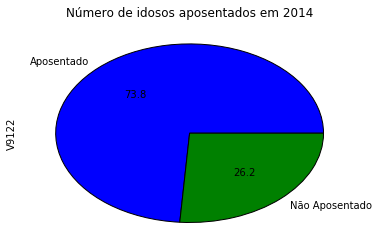

In [159]:
aposentados = pnad2014.V9122.astype("category")
aposentados.cat.categories = ("Aposentado", "Não Aposentado")
ap_maior_de_15 = aposentados[(pnad2014.V8005 >= 15) & (pnad2014.IDOSO == 'True')]
ap_freq = ap_maior_de_15.value_counts(True) 
ap_freq.plot(kind="pie", autopct='%.1f')
plt.title("Número de idosos aposentados em 2014")

## Aqui, ao compararmos o gráfico de 2011 com o de 2014, vemos que a porcentagem de idosos aposentados cresceu por volta de  0.5%

## Portanto, lidaremos com os aposentados e com os idosos  em situações específicas, já que os idosos representam a maioria dos aposentados no Brasil.

# O objetivo desta pesquisa é comparar o acesso da tecnologia entre jovens e aposentados. Além disso, mostraremos se o crescimento da utilização da tecnologia é maior para idosos ou para jovens.

In [139]:
int_3_meses_11 = pnad2014.V06111
int_3_meses_11 = int_3_meses_11.astype('category')
int_3_meses_11.cat.categories = ("Sim","Não")
int_3_meses_aposentados_11 = pd.crosstab(int_3_meses_11, ap_maior_de_15_11[(pnad2011.IDOSO == 'True')])
int_3_meses_aposentados_11.iloc[:, 0:1]

V9122,Aposentado
V06111,
Sim,8909
Não,7673


In [137]:
int_3_meses = pnad2014.V06111
int_3_meses = int_3_meses.astype('category')
int_3_meses.cat.categories = ("Sim","Não")
int_3_meses_aposentados = pd.crosstab(int_3_meses, ap_maior_de_15[(pnad2014.IDOSO == 'True')] )
int_3_meses_aposentados.iloc[:, 0:1]

V9122,Aposentado
V06111,
Sim,2311
Não,19443


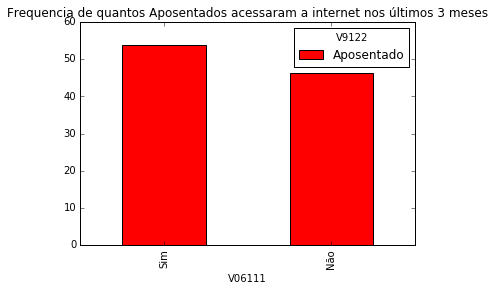

In [140]:
tab_11 = int_3_meses_aposentados_11.iloc[:, 0:1]
freq_11 = tab_11*100/tab_11.sum()
freq_11.plot(kind='bar', color = 'red')
plt.title("Frequencia de quantos Aposentados acessaram a internet nos últimos 3 meses")

## Em 2011 tinhamos mais de 50% com acesso a internet 

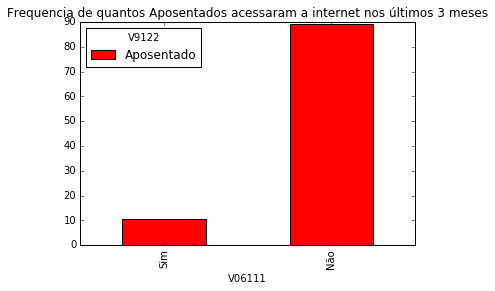

In [138]:
tab = int_3_meses_aposentados.iloc[:, 0:1]
freq = tab*100/tab.sum()
freq.plot(kind='bar', color = 'red')
plt.title("Frequencia de quantos Aposentados acessaram a internet nos últimos 3 meses")

## Enquanto que em 2014 temos apenas 10% de aposentados que acessam a internet, o que representa um grande retrocesso.

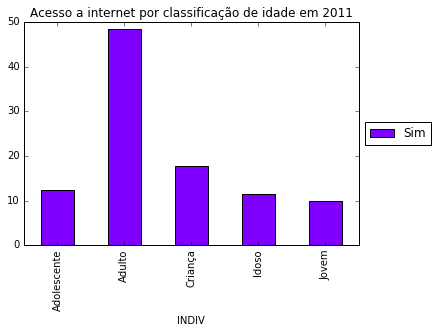

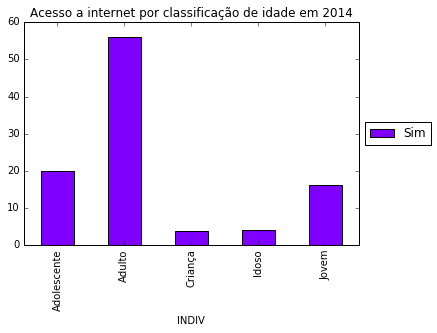

In [161]:
pnad2014["INDIV"] = pnad2014.V8005
def individuo (idade):
    if idade < 12:
        return "Criança"
    elif idade < 19:
        return "Adolescente"
    elif idade < 25:
        return "Jovem"
    elif idade < 60:
        return "Adulto"
    else:
        return "Idoso"

pnad2011["INDIV"] = pnad2011.V8005
pnad2011.INDIV = pnad2011.INDIV.map(individuo)    
tab_11 = pd.crosstab(pnad2011.INDIV, int_3_meses_11)
tab_int_11 = tab_11.iloc[:,0:1]

(tab_int_11*100/tab_int_11.sum()).plot(kind='bar', colormap=('rainbow'), stacked = True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Acesso a internet por classificação de idade em 2011")

pnad2014.INDIV = pnad2014.INDIV.map(individuo)    
tab = pd.crosstab(pnad2014.INDIV, int_3_meses)
tab_int = tab.iloc[:,0:1]

(tab_int*100/tab_int.sum()).plot(kind='bar', colormap=('rainbow'), stacked = True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Acesso a internet por classificação de idade em 2014")


##  Aqui podemos observar que o acesso a internet a jovens cresceu um pouco de 2011 para 2014, porém seguindo uma tendencia contrária, o acesso para idosos diminuiu em quase metade.

In [56]:
#possui celular ou não.

In [142]:
tem_celular = pnad2014.V06112
tem_celular = tem_celular.astype('category')
tem_celular.cat.categories = ("Sim","Não")
tem_celular_aposentados = pd.crosstab(tem_celular, ap_maior_de_15[(pnad2014.IDOSO == 'True')])
tabcel = tem_celular_aposentados.iloc[:,0:1]
tabcel

V9122,Aposentado
V06112,
Sim,10825
Não,10929


In [143]:
tem_celular_11 = pnad2011.V06112
tem_celular_11 = tem_celular_11.astype('category')
tem_celular_11.cat.categories = ("Sim","Não")
tem_celular_aposentados_11 = pd.crosstab(tem_celular_11, ap_maior_de_15_11[(pnad2011.IDOSO == 'True')])
tabcel_11 = tem_celular_aposentados_11.iloc[:,0:1]
tabcel_11

V9122,Aposentado
V06112,
Sim,7383
Não,11834


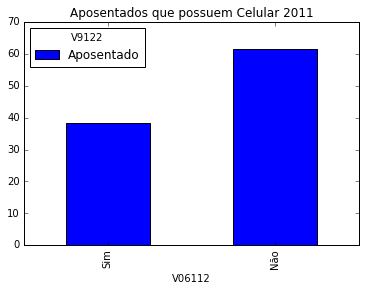

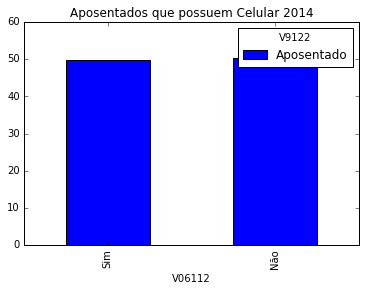

In [162]:
freq = tabcel_11*100/tabcel_11.sum()
freq.plot(kind='bar')
plt.title("Aposentados que possuem Celular 2011")

freq = tabcel*100/tabcel.sum()
freq.plot(kind='bar')
plt.title("Aposentados que possuem Celular 2014")

## Da variável "Possui celular", podemos concluir que entre os aposentados, o acesso a tecnologia por celulares cresceu de 2011 para 2014, já que em 2011 haviam mais aposentados sem celulares enquanto em 2014 cerca da metade deles possuem.

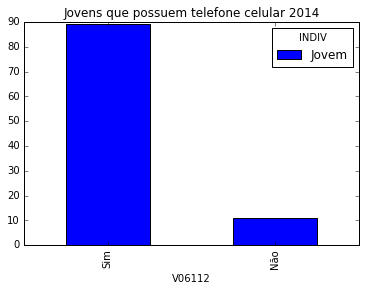

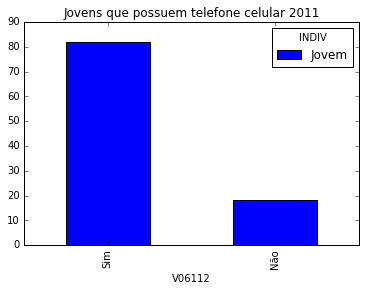

In [62]:
tem_celular_jovens = pd.crosstab(tem_celular, pnad2014.INDIV)
#tabcel = tem_celular_aposentados.iloc[:,0:1]
tabcel_jovens = tem_celular_jovens.iloc[:,4:5]
freq_jovens = tabcel_jovens*100/tabcel_jovens.sum()
freq_jovens.plot(kind='bar')
plt.title("Jovens que possuem telefone celular 2014")

tem_celular_jovens_11 = pd.crosstab(tem_celular_11, pnad2011.INDIV)
#tabcel = tem_celular_aposentados.iloc[:,0:1]
tabcel_jovens_11 = tem_celular_jovens_11.iloc[:,4:5]
freq_jovens_11 = tabcel_jovens_11*100/tabcel_jovens_11.sum()
freq_jovens_11.plot(kind='bar')
plt.title("Jovens que possuem telefone celular 2011")

## Entre os jovens, o crescimento do acesso ao celular foi mais ameno devido ao fato de que ,em 2011, a maioria ja possuia celular próprio e, em 2014, uma parte ainda maior deles passou a possuir.

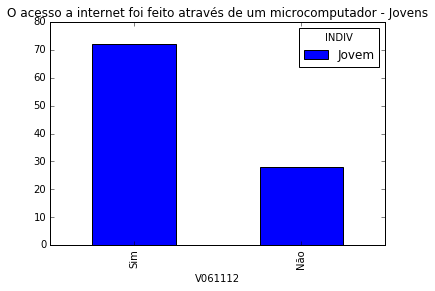

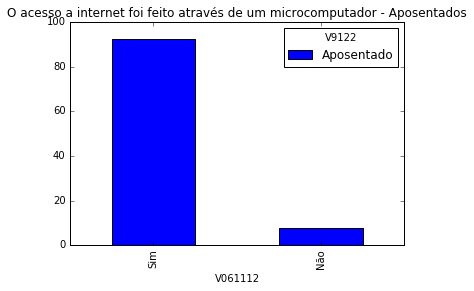

In [163]:
int_pc = pnad2014.V061112
int_pc = int_pc.astype('category')
int_pc.cat.categories = ("Sim","Não")

int_pc_jovens = pd.crosstab(int_pc, pnad2014.INDIV)
pc_jovens = int_pc_jovens.iloc[:,4:5]
freq = pc_jovens*100/pc_jovens.sum()
freq.plot(kind='bar')
plt.title("O acesso a internet foi feito através de um microcomputador - Jovens")

int_pc_aposentados = pd.crosstab(int_pc, ap_maior_de_15[(pnad2014.IDOSO == 'True')])
pc_aposentados = int_pc_aposentados.iloc[:,0:1]
freq = pc_aposentados*100/pc_aposentados.sum()
freq.plot(kind='bar')
plt.title("O acesso a internet foi feito através de um microcomputador - Aposentados")



## Aqui, apesar da maioria dos jovens acessar a internet através do computador, percebemos que os idosos apresentam uma quantidade maior de indivíduos que a acessam através dele. Portanto, apesar de jovens possuirem o hábito de utilizar a internet por meio de celulares, os idosos possuem um hábito maior de acessa-lá pelo computador

0.428724318201


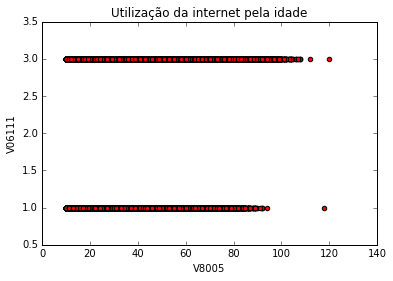

In [216]:
pnad2014.plot.scatter(x='V8005', y='V06111', color='Red')
plt.title("Utilização da internet pela idade")
print(pnad2014.V8005.corr(pnad2014.V06111))

## No gráfico acima, apenas para efeitos de embasamento teórico e analítico, temos um gráfico de dispersão na qual temos a relação entre a utilização da internet pela idade. Atráves de um coeficiente chamado de Correlação podemos dizer o quanto estas varáveis são relacionadas, com este coeficiente podendo variar de -1 a 1. Neste caso, a correlação nos forneceu um valor de 0.428 aproximadamente, o que, considerando o número expressivo de dados (número de pessoas) do PNAD 2014 (362 mil pessoas) podemos considerar como uma boa relação entre as variáveis, fazendo com que nosso estudo de comparação seja válido e significativo.

## Um fator importante para o acesso a tecnologia é a renda, já que para se comprar um celular, por exemplo, deve-se ter recursos financeiros necessários para tal compra.

0.206811190671


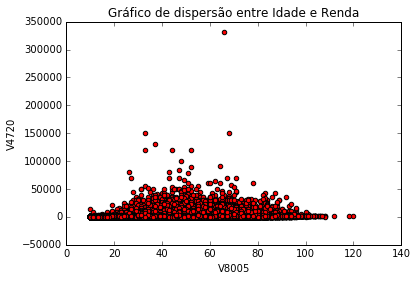

In [220]:
pnad2014.V4720 = pnad2014.V4720[(pnad2014.V4720 != 999999999999)]
pnad2014.plot.scatter(x='V8005', y='V4720', color='Red')
plt.title("Gráfico de dispersão entre Idade e Renda")
print(pnad2014.V8005.corr(pnad2014.V4720))

## Para analisarmos a renda, avaliaremos a diferença da renda entre Idosos Aposentados para anos diferentes.

In [212]:
idosos_e_aposentados_11 = pnad2011[(pnad2011.IDOSO == 'True') & (pnad2011.V9122 == 2)]
renda_idosos_e_aposentados_11 = idosos_e_aposentados_11.V4720[(pnad2011.V4720 < 300000)]
renda_idosos_e_aposentados_11.describe()

count     18677.000000
mean       1308.953526
std        2313.161767
min         545.000000
25%         545.000000
50%         550.000000
75%        1100.000000
max      115000.000000
Name: V4720, dtype: float64

In [190]:
idosos_e_aposentados = pnad2014[(pnad2014.IDOSO == 'True') & (pnad2014.V9122 == 2)]
renda_idosos_e_aposentados = idosos_e_aposentados.V4720[(pnad2014.V4720 != 999999999999)]
renda_idosos_e_aposentados.describe()

count     21256.000000
mean       1741.038248
std        3463.113034
min         620.000000
25%         724.000000
50%         794.000000
75%        1500.000000
max      331200.000000
Name: V4720, dtype: float64

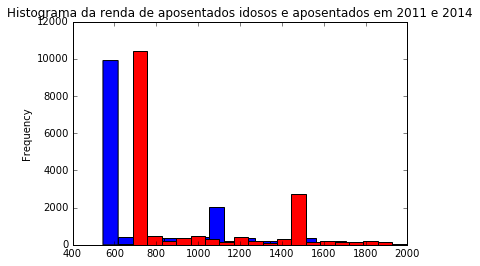

In [211]:
renda_idosos_e_aposentados_11[(pnad2011.V4720 < 2000)].plot.hist(bins=20)
renda_idosos_e_aposentados[(pnad2014.V4720 < 2000)].plot.hist(bins=20, color="red")
plt.title("Histograma da renda de aposentados idosos e aposentados em 2011 e 2014")

## Através da análise da sobreposição dos histogramas, é fácil perceber que a faixa de renda dos idosos aumentou. Através dos valores mostrados pelo método describe confirmamos isso, já que a média de renda dos aposentados e idosos cresceu de um ano para o outro.

# Conclusão

### Resumo

- Como dito no início, o objetivo desta pesquisa era de mostrar a diferença do acesso a tecnologia entre Idosos/Aposentados e Jovense mostrar um pouco desta diferença de realidades, mostrar o impacto de uma mudança de gerações, que apesar de tentarem se apoioarem uma na outra, ainda sobram diferenças imensas. Além disso, esta pesquisa visa mostrar o quanto é necessário o desenvolvimento de tecnologia especialmente para Idosos e Aposentados, já que quase 20% da população é idosa (Aprox. 200 mil habitantes). Consequente disto, também queriamos mostrar o acesso da tecnologia por idosos em 2011 e compará-la com a de 2014, desta forma conseguiríamos concluir se realmente a tecnologia avança para os idosos ou não.
- Assim, começamos mostrando que houve um aumento de 1% do número de idosos de 2011 para 2014 e que este aumento seguiu-se no número de aposentados. A seguir mostramos um Histograma da variável idade e BoxPlots das idades por região em 2011 e 2014, com a finalidade de mostrar que os Brasileiros estão ficando mais velhos ao longo dos anos. Isso tudo serviu de introdução para entendermos a situação dos idosos/Aposentados no país.
- Para a análise de fato, iniciamos pela variável Acesso a Internet nos Últimos 3 meses para concluir que em 2011 tinhamos mais de 50% dos aposentados com acesso a internet enquanto que em 2014 temos apenas 10% de aposentados que acessam a internet, o que representa um grande retrocesso, diferente do que ocorreu para jovens que de 2011 para 2014 o acesso a internet cresceu significativamente. 
- Da variável "Possui celular", podemos concluir que entre os aposentados, o acesso a tecnologia por celulares cresceu de 2011 para 2014, já que em 2011 haviam mais aposentados sem celulares enquanto em 2014 cerca da metade deles possuem. Para Jovens o crescimento do acesso ao celular foi mais ameno devido ao fato de que ,em 2011, a maioria ja possuia celular próprio e, em 2014, uma parte ainda maior deles passou a ter um.
- Na variável "O acesso a internet foi feito através de um microcomputador" concluimos que apesar da maioria dos jovens acessar a internet através do computador, percebemos que os idosos apresentam uma quantidade maior de indivíduos que a acessam através dele. Portanto, os idosos possuem um hábito maior de acessar a internet pelo computador. Isto nos leva a pensar em como fazer ainda mais idosos e aposentados acessarem ainda mais computadores, já que ele mostrou-se como a tecnologia "preferida".
- Depois, apenas para efeitos de embasamento teórico e analítico, vimos um gráfico de dispersão na qual temos a relação entre a utilização da internet pela idade. Atráves de um coeficiente chamado de Correlação podemos dizer o quanto estas varáveis são relacionadas, com este coeficiente podendo variar de -1 a 1. Neste caso, a correlação nos forneceu um valor de 0.428 aproximadamente, o que, considerando o número expressivo de dados (número de pessoas) do PNAD 2014 (362 mil pessoas) podemos considerar como uma boa relação entre as variáveis, fazendo com que nosso estudo de comparação seja válido e significativo.
- Como a renda também é um fator que interfere no acesso a tecnologia, comparamos a renda de aposentados que são idosos e de aposentados que não são idosos. Assim, chegamos a conclusão de que a renda provinda do inss é maior para aqueles que são idosos.
    

### Conclusão Final

Com toda essa pesquisa, terminamos concluindo que é preciso investir em tecnologia para idosos e aposentados já que estes vem crescendo e representarão uma parte do todo cada vez maior. Assim, deve-se seguir o exemplo do que ocorre com os jovens, que crescem na área tecnológica todos os anos. Um maior acesso a tecnologia providencia maiores benefícios, pois também proporciona uma maior disponibilidade de informações e consequentemente uma qualidade de vida maior. 